In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
sns.set()

## Cargar dataset

https://archive.ics.uci.edu/ml/datasets/Mushroom

https://www.kaggle.com/datasets/uciml/mushroom-classification

Objetivo: predecir si una seta es:

* edible=e (comestible)
* poisonous=p (venenosa)

In [2]:
df = pd.read_csv('../data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDAs

<AxesSubplot:xlabel='class', ylabel='count'>

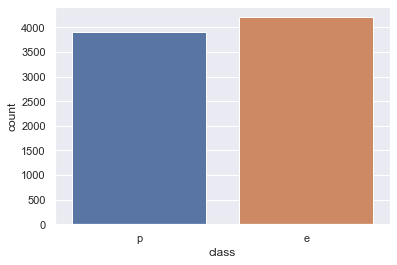

In [3]:
sns.countplot(data=df, x='class')

In [7]:
df.describe().T
# df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [11]:
df.describe().transpose().sort_values('unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [14]:
df_uniques = df.describe().transpose().reset_index().sort_values('unique')
df_uniques

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

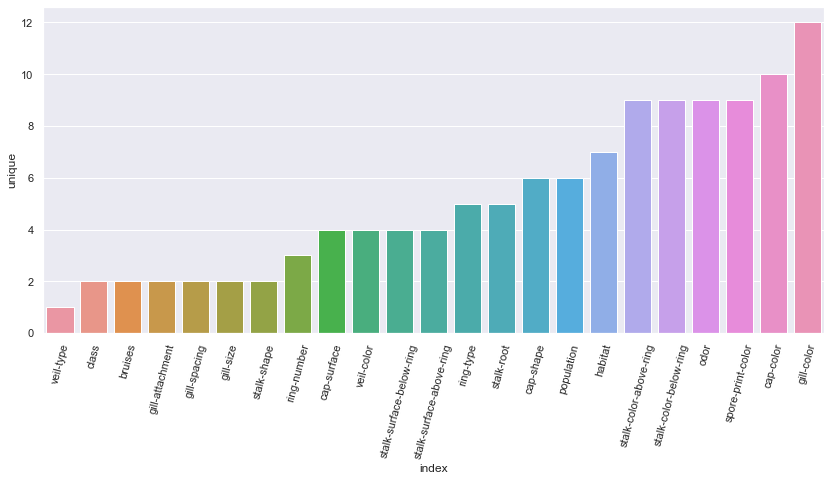

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(data=df_uniques, x='index', y='unique')
plt.xticks(rotation=75)

## Preparar datos

In [20]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
y = df['class'].map({
    'p': 0,
    'e': 1
})
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
y_train.value_counts()

1    2530
0    2344
Name: class, dtype: int64

In [87]:
def report_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("precision: ", precision_score(y_test, y_pred))
    print("recall (Sensitivity): ", recall_score(y_test, y_pred))
    print("F1-score: ", f1_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))
    # print(classification_report(y_test, y_pred))

## DecisionTreeClassifier

In [88]:
%%time

model = DecisionTreeClassifier(max_depth=1)
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  0.8809230769230769
precision:  0.9653929343907715
recall (Sensitivity):  0.7979737783075089
F1-score:  0.8737357259380097
AUC:  0.8837197135812354
Wall time: 26.5 ms


## RandomForestClassifier

In [89]:
%%time
model = RandomForestClassifier(max_depth=2, n_estimators=10)
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  0.9796923076923076
precision:  0.9718969555035128
recall (Sensitivity):  0.9892729439809297
F1-score:  0.980507974010632
AUC:  0.9793692964179457
Wall time: 83.2 ms


## AdaBoostClassifier

In [90]:
model = AdaBoostClassifier() # utiliza 50 árboles por defecto
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
F1-score:  1.0
AUC:  1.0


In [118]:
model = AdaBoostClassifier(n_estimators=1) # 1 único árbol de profundidad 1
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  0.8809230769230769
precision:  0.9653929343907715
recall (Sensitivity):  0.7979737783075089
F1-score:  0.8737357259380097
AUC:  0.8837197135812354


In [99]:
print(model.feature_importances_)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


In [101]:
filter = model.feature_importances_.argmax()
X.columns[filter]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

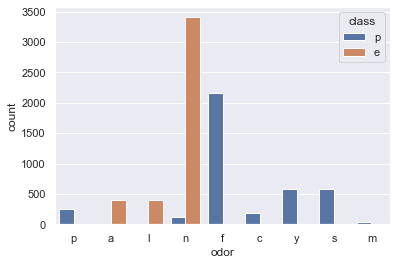

In [97]:
sns.countplot(data=df, x='odor', hue='class')

In [79]:
%%time
# customizar el árbol
cart = DecisionTreeClassifier(max_depth=3, max_features=5)
model = AdaBoostClassifier(base_estimator=cart, n_estimators=5)
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  0.988
precision:  0.983480825958702
recall (Sensitivity):  0.9934445768772348
F1-score:  0.9884375926474949
AUC:  0.9878164360213145
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1572
           1       0.98      0.99      0.99      1678

    accuracy                           0.99      3250
   macro avg       0.99      0.99      0.99      3250
weighted avg       0.99      0.99      0.99      3250

Wall time: 103 ms


### Método codo

Wall time: 19.8 s


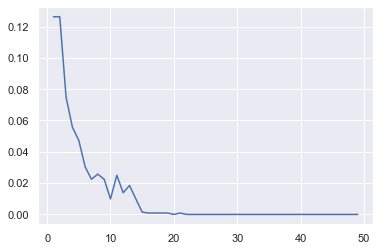

In [103]:
errors = []

for n in range(1,50):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = 1 - f1_score(y_test, y_pred)
    errors.append(error)

plt.plot(range(1,50), errors)

In [108]:
%%time
model = AdaBoostClassifier(n_estimators=15)
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  0.9984615384615385
precision:  0.9970291146761735
recall (Sensitivity):  1.0
F1-score:  0.9985123475156205
AUC:  0.998409669211196
Wall time: 305 ms


In [109]:
%%time
model = AdaBoostClassifier(n_estimators=50)
report_results(model, X_train, X_test, y_train, y_test)

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
F1-score:  1.0
AUC:  1.0
Wall time: 882 ms


In [111]:
df_features = pd.DataFrame(data=model.feature_importances_, columns=['Feature importance'], index=X.columns)
df_features

,Feature importance
cap-shape_c,0.00
cap-shape_f,0.00
cap-shape_k,0.00
cap-shape_s,0.00
cap-shape_x,0.00
...,...
habitat_l,0.02
habitat_m,0.00
habitat_p,0.00
habitat_u,0.00


In [113]:
gt_0 = df_features['Feature importance'] > 0
df_imp = df_features[gt_0].sort_values('Feature importance', ascending=False)
df_imp

,Feature importance
spore-print-color_w,0.16
gill-spacing_w,0.10
gill-size_n,0.10
stalk-color-below-ring_n,0.08
population_c,0.08
spore-print-color_r,0.06
odor_n,0.06
odor_c,0.04
odor_f,0.04
stalk-shape_t,0.04


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'spore-print-color_w'),
  Text(1, 0, 'gill-spacing_w'),
  Text(2, 0, 'gill-size_n'),
  Text(3, 0, 'stalk-color-below-ring_n'),
  Text(4, 0, 'population_c'),
  Text(5, 0, 'spore-print-color_r'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_c'),
  Text(8, 0, 'odor_f'),
  Text(9, 0, 'stalk-shape_t'),
  Text(10, 0, 'stalk-surface-above-ring_k'),
  Text(11, 0, 'population_v'),
  Text(12, 0, 'cap-color_c'),
  Text(13, 0, 'habitat_l'),
  Text(14, 0, 'stalk-surface-below-ring_y'),
  Text(15, 0, 'ring-type_p'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'cap-color_w'),
  Text(18, 0, 'odor_p'),
  Text(19, 0, 'habitat_w')])

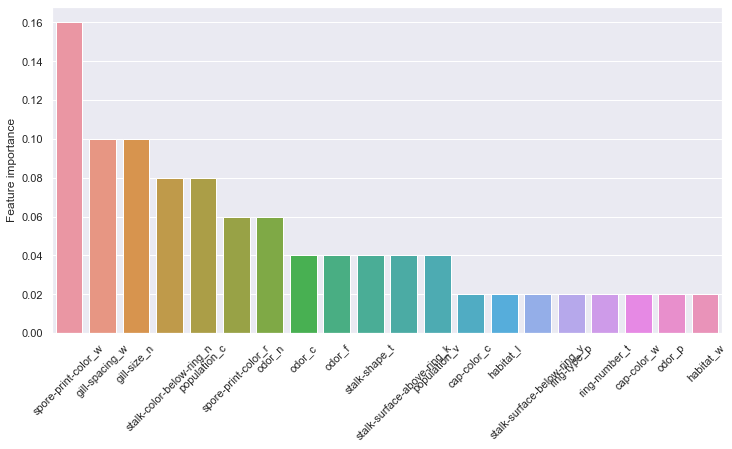

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_imp, x=df_imp.index, y='Feature importance')
plt.xticks(rotation=45)

## GradientBoostingClassifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1)
report_results(model, X_train, X_test, y_train, y_test)


accuracy:  0.9846153846153847
precision:  0.9981640146878825
recall (Sensitivity):  0.9719904648390941
F1-score:  0.984903381642512
AUC:  0.9850410339462647


In [122]:
print(model.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.63588717e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.48444225e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.79358469e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.97380084e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.00255618e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [126]:
params = {
    'n_estimators': [2, 3, 5, 7, 10],
    'max_depth': [1, 3, 5]
}

In [127]:
%%time
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(X_train, y_train)

Wall time: 5.32 s


GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=1),
             param_grid={'max_depth': [1, 3, 5],
                         'n_estimators': [2, 3, 5, 7, 10]})

In [128]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [129]:
report_results(grid, X_train, X_test, y_train, y_test)

accuracy:  0.9996923076923077
precision:  0.9994044073853484
recall (Sensitivity):  1.0
F1-score:  0.9997021149836164
AUC:  0.9996819338422392


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'odor_n'),
  Text(1, 0, 'stalk-root_c'),
  Text(2, 0, 'stalk-surface-below-ring_y'),
  Text(3, 0, 'spore-print-color_r'),
  Text(4, 0, 'stalk-color-above-ring_w'),
  Text(5, 0, 'gill-color_g')])

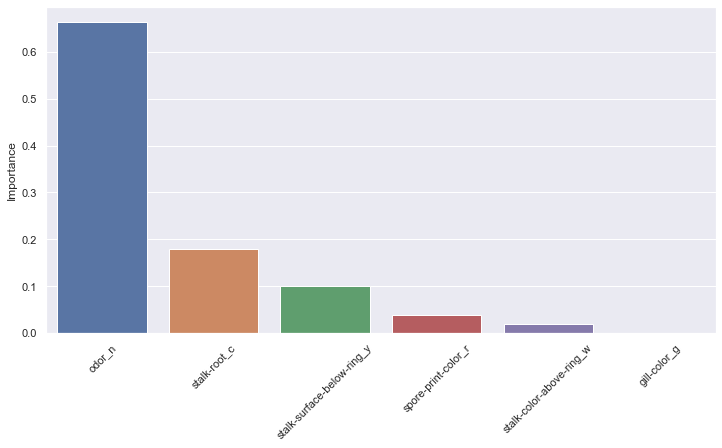

In [130]:
df_features = pd.DataFrame(data=model.feature_importances_, columns=['Importance'], index=X.columns)
gt_0 = df_features['Importance'] > 0
df_imp = df_features[gt_0].sort_values('Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_imp, x=df_imp.index, y='Importance')
plt.xticks(rotation=45)